### Task 6.2 Exploring Relationships
#### 1.Import Visualization Libraries & Data
#### 2.Data checking & clean data
#### 3.Exploring Relationships 
     Correlations
     Scatterplots
     Pair Plots
     Categorial Plots 
#### 4. QA & Hypothesis
#### 5. Export Data 

### 1.Importing Visualizations Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Defining path
path = r'C:\Users\dolson\OneDrive - BEACON TECHNOLOGIES\Desktop\Achievement6'

In [5]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boatclean6.1.csv'), index_col=[0])

### 2.Data checking & clean data

In [6]:
# checking dataframe
df.shape

(9241, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9241 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Boat Type          9241 non-null   object 
 1   Manufacturer       9241 non-null   object 
 2   Type               9241 non-null   object 
 3   Year Built         9241 non-null   int64  
 4   Length             9241 non-null   float64
 5   Width              9241 non-null   float64
 6   Material           9241 non-null   object 
 7   Views last 7 days  9241 non-null   int64  
 8   EUR_Price          9241 non-null   int64  
 9   Country            9241 non-null   object 
 10  City               9241 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 866.3+ KB


In [8]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,EUR_Price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3337,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,29266,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern
6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600,Switzerland,Neuenburgersee


In [9]:
df.dtypes

Boat Type             object
Manufacturer          object
Type                  object
Year Built             int64
Length               float64
Width                float64
Material              object
Views last 7 days      int64
EUR_Price              int64
Country               object
City                  object
dtype: object

In [10]:
# Check for missing values
df.isnull().sum()  # No missing values 

Boat Type            0
Manufacturer         0
Type                 0
Year Built           0
Length               0
Width                0
Material             0
Views last 7 days    0
EUR_Price            0
Country              0
City                 0
dtype: int64

In [11]:
# Find duplicates 
df_dups = df[df.duplicated()]

In [12]:
df_dups.shape # No duplicates 

(0, 11)

In [13]:
# Check for Mixed-Type Data
for col in df.columns.tolist():
      mixedtype = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[mixedtype]) > 0:
        print (col)

# No mixed-type columns 

### 3. Explore Relationships

Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


In [14]:
#Create correlation matrix with all varialbes 
df.corr()

,Year Built,Length,Width,Views last 7 days,EUR_Price
Year Built,1.000000,-0.204647,-0.105334,-0.113179,0.095790
Length,-0.204647,1.000000,0.868722,-0.138331,0.509399
Width,-0.105334,0.868722,1.000000,-0.163870,0.475828
Views last 7 days,-0.113179,-0.138331,-0.163870,1.000000,-0.014560
EUR_Price,0.095790,0.509399,0.475828,-0.014560,1.000000


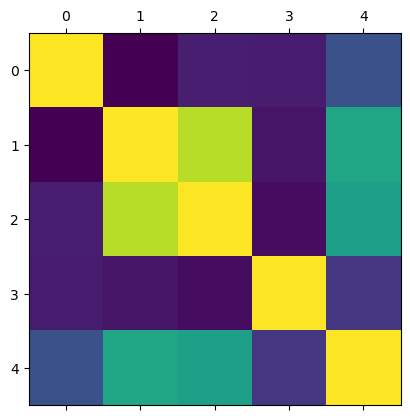

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()
# Save Figure to working directory 
plt.savefig("Corr-heat-nolables.png") 

In [16]:
# What is current directory
cwd = os.getcwd()
cwd

'C:\\Users\\dolson\\OneDrive - BEACON TECHNOLOGIES\\Desktop\\Achievement6\\03 Scripts'

In [17]:
# Create correlation heatmap with labels & legend 
df_labels=df[['Year Built','Length','Width','Views last 7 days','EUR_Price']]

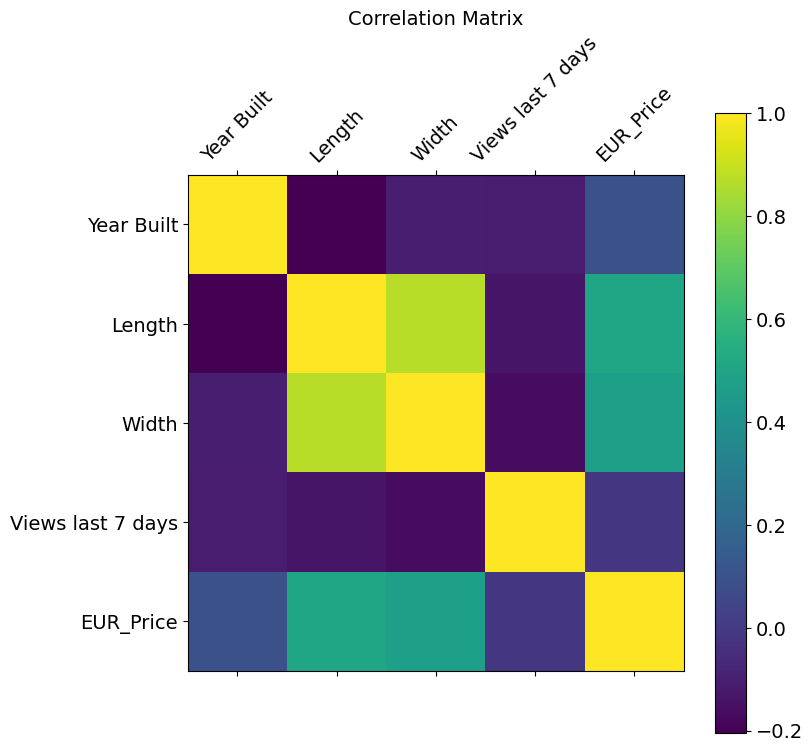

In [18]:
# Create correlation heatmap with labels * legend
# Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_labels.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_labels.shape[1]), df_labels.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_labels.shape[1]), df_labels.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

plt.savefig("Corr-heat-labels.png") 

In review of heatmap, there is a strong correlation with EUR price, size(length and width of boat) 

(<Figure size 800x800 with 2 Axes>, None)

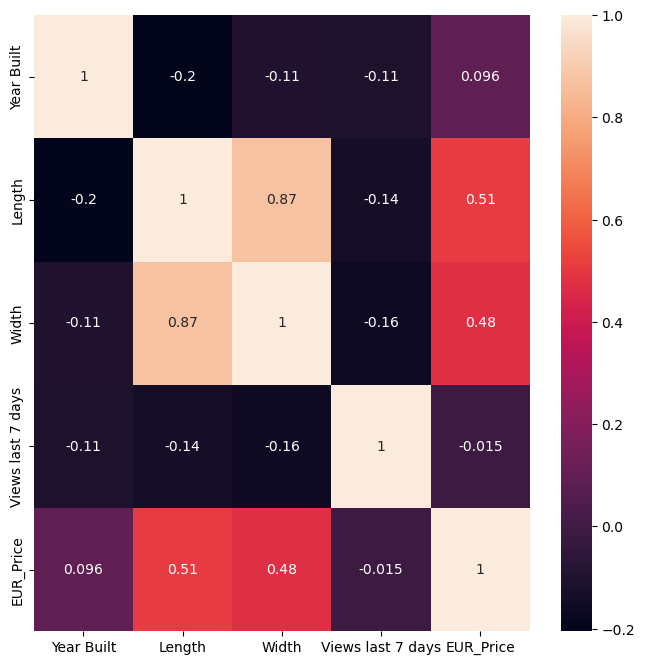

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
# Save to working directory 
f,ax.figure.savefig("CorrHeatMap")

EUR_Price is dependant variable.
Weak negative correlation (-15) with Views last 7 days
interpreted as the more views the higher price, less views lower price.
Weak positve correlation(.096) with Year Built - older boats lower price, new boats higher price
Meadium to strong positive correlation with width (48) and length(51) of boat - wider and longer boats are higer in price, alternatively boat short and not as wide are lower in price


### Scatterplot
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.


EUR_Price = dependent variable
Length and Width have the strongest correlations will explore in scatter plot(s)

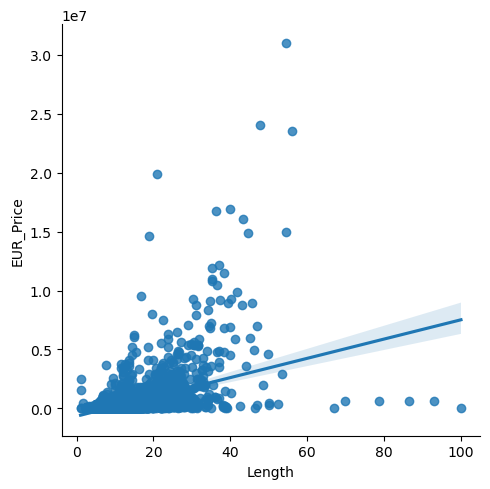

In [20]:
# Scatterplot for variable with strongest correlations
# Variables Length and EURPrice
SCLP=sns.lmplot(x='Length', y ='EUR_Price', data = df)

There is an upward positive trend for boats that are longer in length and price. Boats that are longer are typically higher in price. There are a few that are longer and price is not as high,this may be due to age (year built) of boat. 

In [21]:
SCLP.savefig("ScatterPlot Length & EURPrice")

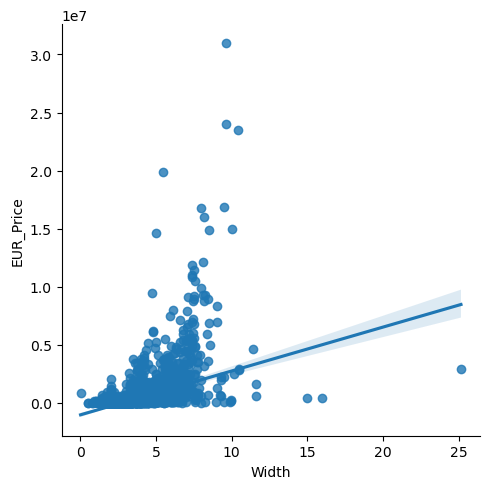

In [22]:
# Scatterplot for the "Width" and "EURPrice"
SCWP=sns.lmplot(x='Width', y ='EUR_Price', data = df)

There is an upward postitive trend for boats that are wider 
in length and price. Boats that are wider, just like
length are typically higher in price. There are a few that 
are wide and long and price is not as high,this may be 
due to age (year built) of boat.

In [23]:
SCWP.savefig("ScatterPlot Width & EURPrice")

### Pair plots
Create a pair plot of the entire data set.

In [24]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,EUR_Price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3337,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,29266,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern
6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600,Switzerland,Neuenburgersee


In [25]:
df.dtypes

Boat Type             object
Manufacturer          object
Type                  object
Year Built             int64
Length               float64
Width                float64
Material              object
Views last 7 days      int64
EUR_Price              int64
Country               object
City                  object
dtype: object

In [26]:
# Create subset with only columns needed for pair plot
subset=df[['Year Built', 'Length', 'Width', 'Views last 7 days','EUR_Price']]

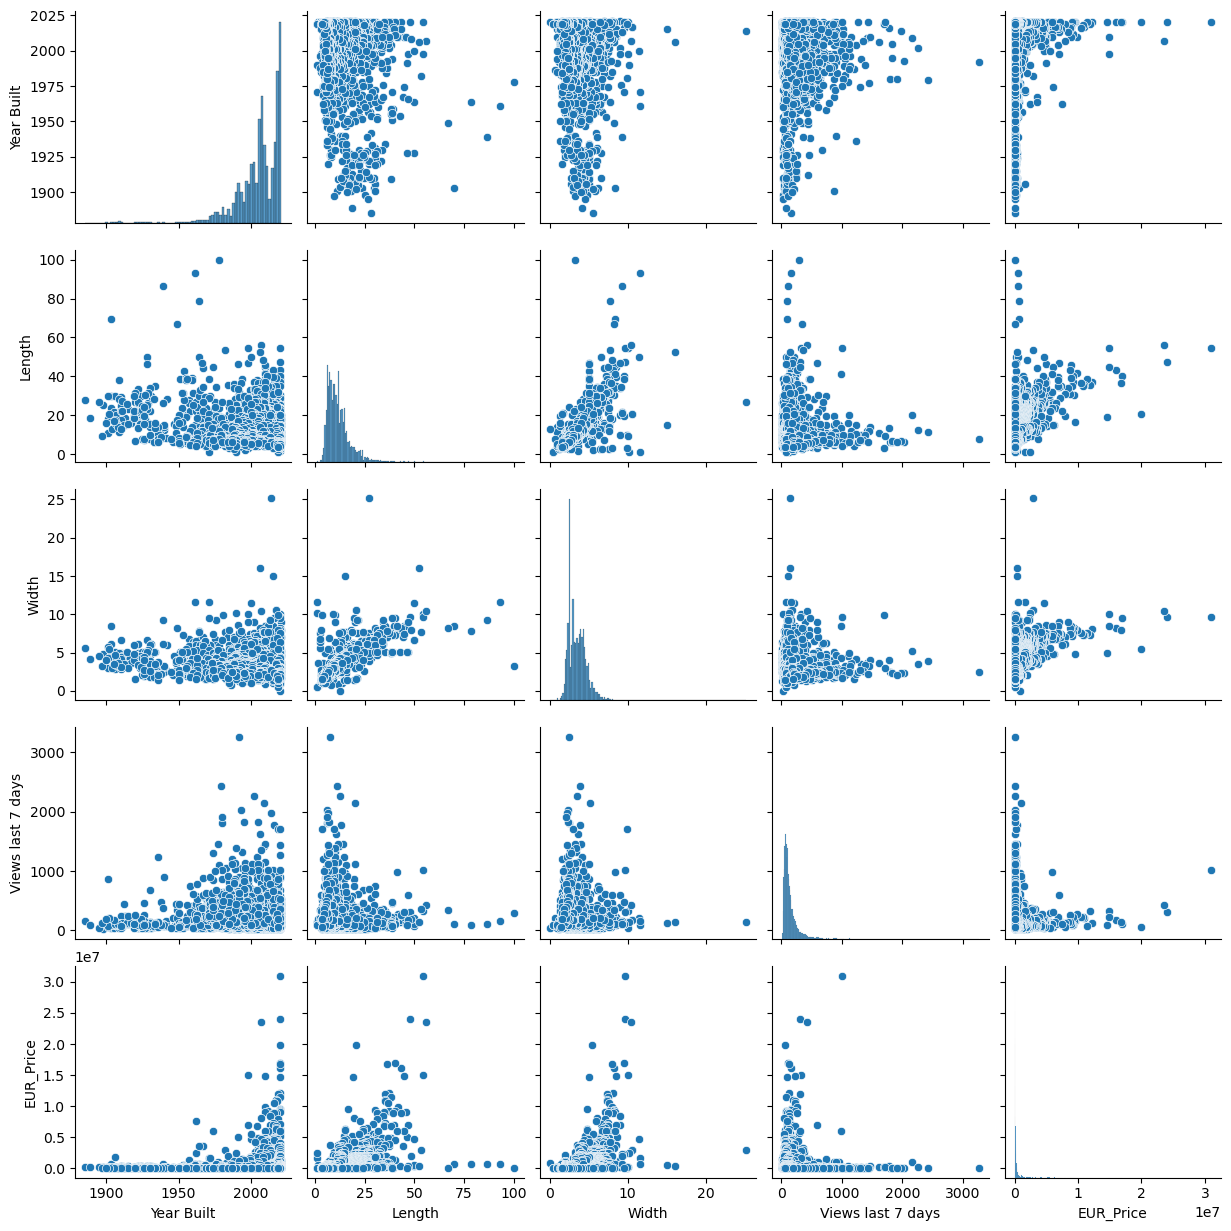

In [27]:
# Create pair plot
pairplot = sns.pairplot(subset)

In [28]:
pairplot.savefig("pairplot")

Correlations with views in last 7 days and boat price, more views at less expensive boats. Price and year built, newer boats are more expensive. 

### Categorical plots

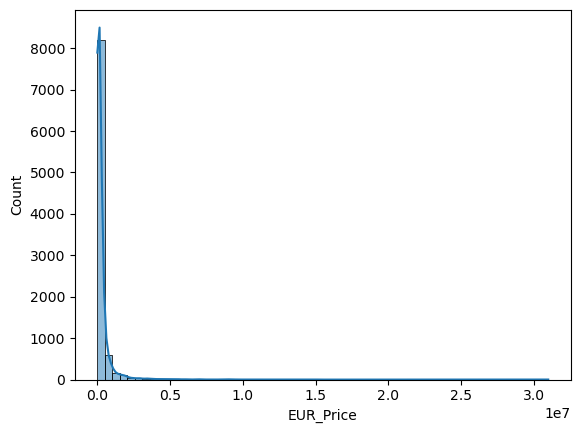

In [29]:
# Create a histogram of boat prices to visualize the distribution
catplot=sns.histplot(df['EUR_Price'],bins=60,kde=True)

In [30]:
# Save figure to workging directory
catplot.figure.savefig("Histogram EurPrice")


In [31]:
#create price category for listing
df.loc[df['EUR_Price'] <50000, 'PriceCategory'] = 'Low-priced'
df.loc[(df['EUR_Price'] >=50000) & (df['EUR_Price'] <=100000), 'PriceCategory'] = 'Mid-Priced'
df.loc[df['EUR_Price'] >100000, 'PriceCategory'] = 'High-Priced'


In [32]:
df['PriceCategory'].value_counts(dropna=False)

High-Priced    4353
Low-priced     2784
Mid-Priced     2104
Name: PriceCategory, dtype: int64

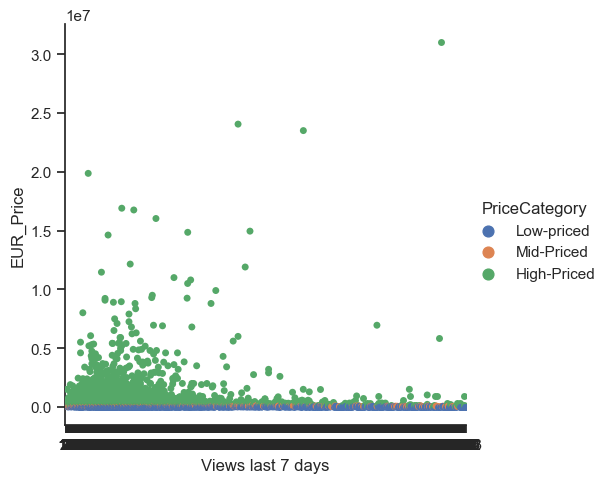

In [33]:
# creating a categorical plot in searborn, with views and price
sns.set(style='ticks')
C1 = sns.catplot(x='Views last 7 days', y='EUR_Price', hue = 'PriceCategory', data = df)

In [34]:
# Save figure to working directory 
C1.figure.savefig("Views and Price")

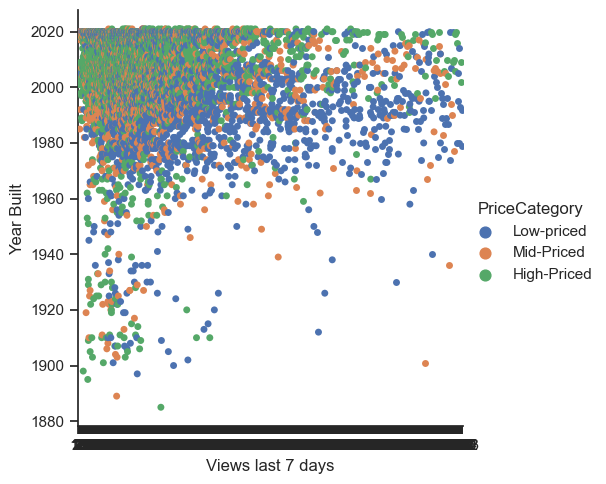

In [36]:
# Create categorial plot crossing views with year built
sns.set(style='ticks')
C2 = sns.catplot(x='Views last 7 days', y='Year Built', hue = 'PriceCategory', data = df)
                              

In [37]:
# Save figure to working directory
C2.figure.savefig("Views and Year Built")

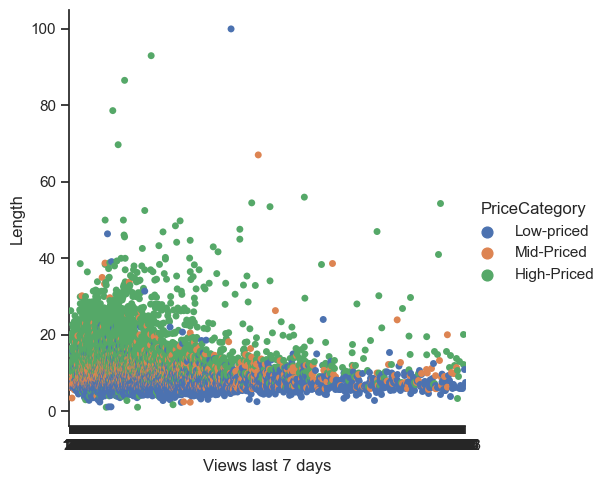

In [38]:
# Create categorial plot crossing views with year built
sns.set(style='ticks')
C3 = sns.catplot(x='Views last 7 days', y='Length', hue = 'PriceCategory', data = df)

In [39]:
# Save figure to working directory
C3.figure.savefig("Views and Length")

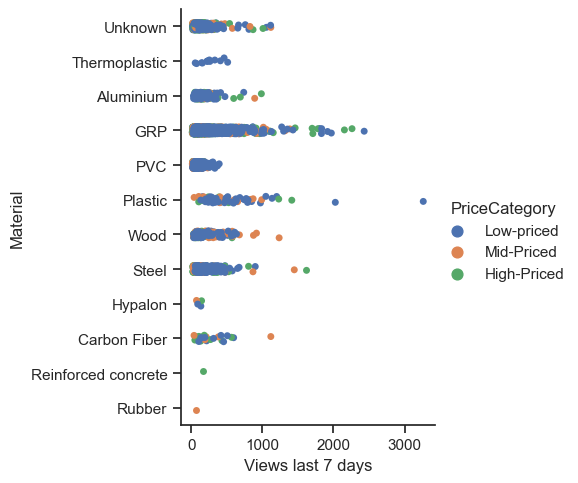

In [42]:
# Creating a categorical plot crossing the views with material
sns.set(style='ticks')
C4 = sns.catplot(x='Views last 7 days', y='Material', hue = 'PriceCategory', data = df)

In [43]:
# Save figure to working directory
C4.figure.savefig("Views and Material")

In [ ]:
# Save figure to working directory
z C5.figure.savefig("Views and Boat Type")

In [40]:
#count of country
df['Country'].value_counts(dropna=False)

Italy                            1612
Germany                          1544
France                           1066
Switzerland                       979
Netherlands                       923
                                 ... 
Donau                               1
Adria                               1
Ireland                             1
Neustadt in Holstein (Ostsee)       1
Thun                                1
Name: Country, Length: 136, dtype: int64

In [45]:
#count of country
df['Boat Type'].value_counts(dropna=False)

Motor Yacht                        2577
Sport Boat                         1260
Flybridge                          1169
Trawler                             659
Pilothouse                          564
                                   ... 
Bowrider,Motor Yacht,Sport Boat       1
Classic,Motor Yacht,Sport Boat        1
Bowrider,Cabin Boat,Deck Boat         1
Motor Yacht,Wakeboard/Wakesurf        1
Classic,Runabout,Trawler              1
Name: Boat Type, Length: 125, dtype: int64

### 4. Q&A and Hypothesis
Questions and Answers

What are the attributes of the most viewed boats?
*** Higher priced boats get more views
*** Newer boats get more views
*** Longer boats get more views
*** Boats made of GRP material get more views

Which country has most boats listed?
*** Italy has most boats listed 1612, then Germany 1544

Which Boat Type has most boats listed?
*** Motor Yacht 2577, then Sport Boat

 

Hypothesis

If a boat is at a higher price, it will get more views, if a boat is longer in length it will be at a higher price.

### 5. Exporting data

In [46]:
# Exporting the data 
df.to_csv(os.path.join(path, '02 Data','Prepared data', 'boatclean6.2.csv'))